# LAB-5

## Understanding SVD

In [16]:
import numpy as np
import math
def compute_svd(matrix):
    """
    Computes the Singular Value Decomposition (SVD) of the input matrix using power iteration.
    
    Parameters:
    matrix (ndarray): Input matrix to decompose.
    
    Returns:
    U (ndarray): Left singular vectors.
    S (ndarray): Singular values in a diagonal matrix.
    VT (ndarray): Right singular vectors (transposed).
    
    Note: This implementation does not use np.linalg.svd(). 
    Instead, it uses power iteration as discussed in class.
    """
    # Step 1: Initialize variables
    m, n = matrix.shape
    U = np.zeros((m, min(m, n)))
    S = np.zeros((min(m, n), min(m, n)))
    VT = np.zeros((min(m, n), n))
    
    # Set number of iterations for power iteration
    max_iter = 3000

    # Step 2: Compute left singular vectors (U)
    mmt = np.matmul(matrix, matrix.T).astype(float)  # Ensure mmt is float
    for i in range(min(m, n)):
        x0 = np.random.rand(m)  # Random initial vector
        for _ in range(max_iter):
            x0 = np.matmul(mmt, x0)
            x0 = x0 / np.linalg.norm(x0)
        U[:, i] = x0
        
        # Compute the corresponding singular value
        singular_value = np.matmul(x0.T, np.matmul(mmt, x0))
        S[i, i] = np.sqrt(singular_value) if singular_value > 0 else 0
        
        # Deflate the matrix to remove the component just computed
        mmt -= singular_value * np.outer(x0, x0.T)

    # Step 3: Compute right singular vectors (VT)
    mtm = np.matmul(matrix.T, matrix).astype(float)  # Ensure mtm is float
    for i in range(min(m, n)):
        x0 = np.random.rand(n)  # Random initial vector
        for _ in range(max_iter):
            x0 = np.matmul(mtm, x0)
            x0 = x0 / np.linalg.norm(x0)
        VT[i, :] = x0
        
        # Compute the corresponding singular value
        singular_value = np.matmul(x0.T, np.matmul(mtm, x0))
        S[i, i] = np.sqrt(singular_value) if singular_value > 0 else 0
        
        # Deflate the matrix to remove the component just computed
        mtm -= singular_value * np.outer(x0, x0.T)

    return U, S, VT

In [17]:
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute the SVD
U, S, VT = compute_svd(A)

# Print the results
print("U matrix:\n", U)
print("\nSingular values (S):\n", S)
print("\nV^T matrix:\n", VT)


U matrix:
 [[ 0.2298477   0.88346102]
 [ 0.52474482  0.24078249]
 [ 0.81964194 -0.40189603]]

Singular values (S):
 [[9.52551809 0.        ]
 [0.         0.51430058]]

V^T matrix:
 [[ 0.61962948  0.78489445]
 [-0.78489445  0.61962948]]


In [18]:
def reconstruct_matrix(U, S, VT):
    """
    Reconstructs the original matrix from its SVD components.

    Parameters:
    U (ndarray): Left singular vectors
    S (ndarray): Singular values
    VT (ndarray): Right singular vectors (transposed)

    Returns:
    ndarray: Reconstructed matrix
    """
    return np.dot(U, np.dot(S, VT))


## Reconstruction from SVD

In [19]:
# Reconstruct the matrix
A_reconstructed = reconstruct_matrix(U, S, VT)

# Print the reconstructed matrix
print("Reconstructed matrix:\n", A_reconstructed)

# Verify reconstruction
print("\nOriginal matrix A:\n", A)


Reconstructed matrix:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]

Original matrix A:
 [[1 2]
 [3 4]
 [5 6]]


In [20]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data[:300]  # First 300 samples


## Dimensionality Reduction using SVD

In [21]:
def reduce_dimensions_via_svd(X, num_components):
    """
    Reduces the dimensionality of the dataset using SVD.

    Parameters:
    X (ndarray): Original dataset (n_samples, n_features)
    num_components (int): Number of singular values to retain

    Returns:
    X_reduced (ndarray): Dataset with reduced dimensions
    X_reconstructed (ndarray): Dataset reconstructed from reduced dimensions
    """
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    S_reduced = np.diag(S[:num_components])
    X_reduced = U[:, :num_components] @ S_reduced
    X_reconstructed = X_reduced @ VT[:num_components, :]
    return X_reduced, X_reconstructed

# Reduce dimensions and reconstruct
X_reduced, X_reconstructed = reduce_dimensions_via_svd(X, 20)

print("Shape of reduced dataset:", X_reduced.shape)
print("Shape of reconstructed dataset:", X_reconstructed.shape)


Shape of reduced dataset: (300, 20)
Shape of reconstructed dataset: (300, 64)


In [22]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(X, X_reconstructed)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.4207210191244957


## Visualizing Dimensionality Reduction

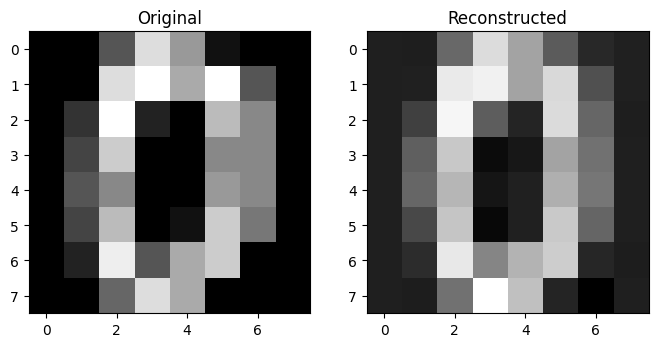

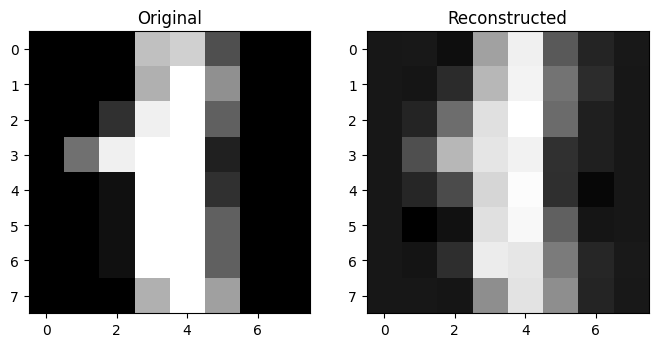

In [23]:
import matplotlib.pyplot as plt

def plot_digits_comparison(original, reconstructed, index):
    """
    Plots the original and reconstructed digits side by side for comparison.

    Parameters:
    original (ndarray): Original dataset
    reconstructed (ndarray): Reconstructed dataset
    index (int): Index of the sample to plot
    """
    original_digit = original[index].reshape(8, 8)
    reconstructed_digit = reconstructed[index].reshape(8, 8)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_digit, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(reconstructed_digit, cmap='gray')
    axes[1].set_title('Reconstructed')
    plt.show()

# Plot comparison for two samples
plot_digits_comparison(X, X_reconstructed, index=0)
plot_digits_comparison(X, X_reconstructed, index=1)


Singular Values: 5, MSE: 8.047216313572234
Singular Values: 10, MSE: 3.961820356796363
Singular Values: 20, MSE: 1.4207210191244957
Singular Values: 30, MSE: 0.514843093759145
Singular Values: 50, MSE: 0.0009353297779540147
Singular Values: 100, MSE: 4.93555276694961e-28


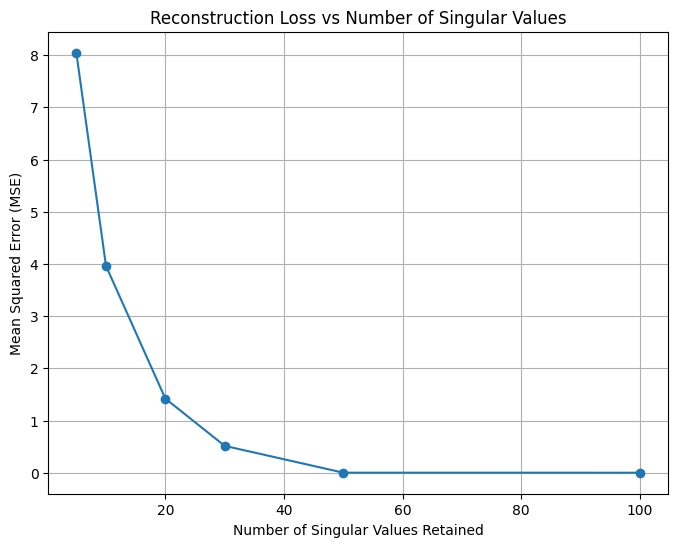

In [24]:
# Function to plot reconstruction loss for different values of singular values
def plot_reconstruction_loss(X, svd_values):
    """
    Plots the reconstruction loss (MSE) for different numbers of singular values retained during SVD.

    Parameters:
    X (ndarray): Original dataset (n_samples, n_features)
    svd_values (list): List of singular values to test
    """
    mse_values = []
    
    # Iterate over different values of singular values to retain
    for num_singular_values in svd_values:
        _, X_reconstructed = reduce_dimensions_via_svd(X, num_singular_values)
        
        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(X, X_reconstructed)
        mse_values.append(mse)
        print(f"Singular Values: {num_singular_values}, MSE: {mse}")
    
    # Plot the reconstruction loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(svd_values, mse_values, marker='o')
    plt.title("Reconstruction Loss vs Number of Singular Values")
    plt.xlabel("Number of Singular Values Retained")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.grid(True)
    plt.show()

# Define a range of singular values to test
svd_values = [5, 10, 20, 30, 50, 100]

# Plot the reconstruction loss for different singular values
plot_reconstruction_loss(X, svd_values)